In [10]:
import gzip
import csv

# Input CSV file
input_csv_file = 'survey_results_public_cleaned_use.csv'

# Output compressed file
output_gz_file = 'compressed.csv.gz'

# Open the input CSV file
with open(input_csv_file, 'r', newline='') as input_file:
    # Open the output compressed file
    with gzip.open(output_gz_file, 'wt', newline='') as output_file:
        # Create a CSV writer
        csv_writer = csv.writer(output_file)
        
        # Read the CSV data and write it to the compressed file
        csv_reader = csv.reader(input_file)
        for row in csv_reader:
            csv_writer.writerow(row)

print(f'{input_csv_file} has been compressed to {output_gz_file}')


survey_results_public_cleaned_use.csv has been compressed to compressed.csv.gz


In [1]:
import gzip

# Compressed file
compressed_file = 'compressed.csv.gz'

# Output CSV file
output_csv_file = 'survey_results_public_cleaned_use.csv'

# Open the compressed file for reading
with gzip.open(compressed_file, 'rt') as input_file:
    # Open the output CSV file for writing
    with open(output_csv_file, 'w', newline='') as output_file:
        # Read the compressed data and write it to the output CSV file
        for line in input_file:
            output_file.write(line)

print(f'{compressed_file} has been uncompressed to {output_csv_file}')


FileNotFoundError: [Errno 2] No such file or directory: 'compressed.csv.gz'

In [1]:
import pandas as pd
all_data = pd.read_csv('survey_results_public_cleaned_use.csv')

# limit the data to people ages 18 - 34
df = all_data.query('Age in ["18-24 years old", "25-34 years old"]')
df.head()

,ResponseId,MainBranch,Age,Employment,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,TimeSearching,ProfessionalTech,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,...,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,...,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,15-30 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,...,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,60-120 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
7,8,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;edX,5,...,NaN,NaN,NaN,NaN,NaN,NaN,60-120 minutes a day,None of these,Financial Services,80000.0


In [2]:
def getUnique(column):
    possibleActivities = set()
    for unique in df[column].unique():
        if not type(unique) is str: continue 
        
        for activity in unique.split(';'):
            possibleActivities.add(activity)

    possibleActivities = sorted(possibleActivities)
    return possibleActivities

In [3]:
getUnique('Industry')

['Advertising Services',
 'Financial Services',
 'Healthcare',
 'Higher Education',
 'Information Services, IT, Software Development, or other Technology',
 'Insurance',
 'Legal Services',
 'Manufacturing, Transportation, or Supply Chain',
 'Oil & Gas',
 'Other',
 'Retail and Consumer Services',
 'Wholesale']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51178 entries, 0 to 89180
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           51178 non-null  int64  
 1   MainBranch                           51178 non-null  object 
 2   Age                                  51178 non-null  object 
 3   Employment                           50607 non-null  object 
 4   CodingActivities                     41849 non-null  object 
 5   EdLevel                              50635 non-null  object 
 6   LearnCode                            50470 non-null  object 
 7   LearnCodeOnline                      40727 non-null  object 
 8   LearnCodeCoursesCert                 22002 non-null  object 
 9   YearsCode                            50323 non-null  object 
 10  YearsCodePro                         35690 non-null  object 
 11  DevType                     

In [3]:
def separate_into_boolean_columns(column):
    global df
    # Split the activities and create Boolean columns
    unique_activities = getUnique(column)
    for activity in unique_activities:
        df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)

    # Fill NaN values with False
    df = df.fillna(False)
    return df.describe()

In [4]:
columns = ["LanguageHaveWorkedWith",  "CodingActivities", 'Industry']
for column in columns:
    print(getUnique(column))
    separate_into_boolean_columns(column)

['APL', 'Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Raku', 'Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig']


C:\Users\akash\AppData\Local\Temp\ipykernel_21708\4002448768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)
C:\Users\akash\AppData\Local\Temp\ipykernel_21708\4002448768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)
C:\Users\akash\AppData\Local\Temp\ipykernel_21708\4002448768.py:6: SettingWithCopy

['Bootstrapping a business', 'Contribute to open-source projects', 'Freelance/contract work', 'Hobby', 'I don’t code outside of work', 'Other (please specify):', 'Professional development or self-paced learning from online courses', 'School or academic work']
['Advertising Services', 'Financial Services', 'Healthcare', 'Higher Education', 'Information Services, IT, Software Development, or other Technology', 'Insurance', 'Legal Services', 'Manufacturing, Transportation, or Supply Chain', 'Oil & Gas', 'Other', 'Retail and Consumer Services', 'Wholesale']


In [8]:
all_industries = getUnique('Industry')

language_industries = {
    # language: {industry: count}
}

target_languages = ['Python', 'JavaScript', 'Rust', 'SQL', 'TypeScript', 'Bash/Shell (all shells)']

# Create a dictionary of languages
languages = {}

# Convert numbers to floats and less than 1 year text to 0\
map_dict = { 'Less than 1 year': 0.5, 'More than 50 years': 51, False: 0.5 }
for num in range(1, 51):
    map_dict[str(num)] = num

df['YearsCodeProNum'] = df['YearsCodePro'].map(map_dict).astype(float)

for language in target_languages:
    # make sure only language is true and all the other languages in the list are false
    target_language = df[df[language] == True]

    for other_language in target_languages:
        if other_language == language: continue
        target_language = target_language[target_language[other_language] == False]
    
    print(f'{language} has {target_language.shape[0]} rows')
    
    # find the salary
    average_salary = target_language['ConvertedCompYearly'].mean()
    
    average_years_worked = target_language['YearsCodeProNum'].mean()
    languages[language] = [df[language].sum(), average_salary, average_years_worked]
    language_industries[language] = {industry: target_language[industry].sum() for industry in all_industries}


language_industries

Python has 2936 rows
JavaScript has 2507 rows
Rust has 440 rows
SQL has 1153 rows
TypeScript has 656 rows
Bash/Shell (all shells) has 524 rows


{'Python': {'Advertising Services': 17,
  'Financial Services': 101,
  'Healthcare': 50,
  'Higher Education': 46,
  'Information Services, IT, Software Development, or other Technology': 457,
  'Insurance': 14,
  'Legal Services': 4,
  'Manufacturing, Transportation, or Supply Chain': 100,
  'Oil & Gas': 13,
  'Other': 164,
  'Retail and Consumer Services': 42,
  'Wholesale': 4},
 'JavaScript': {'Advertising Services': 32,
  'Financial Services': 104,
  'Healthcare': 44,
  'Higher Education': 18,
  'Information Services, IT, Software Development, or other Technology': 549,
  'Insurance': 10,
  'Legal Services': 11,
  'Manufacturing, Transportation, or Supply Chain': 54,
  'Oil & Gas': 6,
  'Other': 85,
  'Retail and Consumer Services': 59,
  'Wholesale': 8},
 'Rust': {'Advertising Services': 1,
  'Financial Services': 13,
  'Healthcare': 5,
  'Higher Education': 1,
  'Information Services, IT, Software Development, or other Technology': 66,
  'Insurance': 1,
  'Legal Services': 1,
  '

In [13]:
for language in language_industries:
    print(language)
    for industry in language_industries[language]:
        if language_industries[language][industry] == 0: continue
        print('\t', industry)

Python
	 Advertising Services
	 Financial Services
	 Healthcare
	 Higher Education
	 Information Services, IT, Software Development, or other Technology
	 Insurance
	 Legal Services
	 Manufacturing, Transportation, or Supply Chain
	 Oil & Gas
	 Other
	 Retail and Consumer Services
	 Wholesale
JavaScript
	 Advertising Services
	 Financial Services
	 Healthcare
	 Higher Education
	 Information Services, IT, Software Development, or other Technology
	 Insurance
	 Legal Services
	 Manufacturing, Transportation, or Supply Chain
	 Oil & Gas
	 Other
	 Retail and Consumer Services
	 Wholesale
Rust
	 Advertising Services
	 Financial Services
	 Healthcare
	 Higher Education
	 Information Services, IT, Software Development, or other Technology
	 Insurance
	 Legal Services
	 Manufacturing, Transportation, or Supply Chain
	 Oil & Gas
	 Other
	 Retail and Consumer Services
SQL
	 Advertising Services
	 Financial Services
	 Healthcare
	 Higher Education
	 Information Services, IT, Software Development

In [12]:
language_industries['Python']

{'Advertising Services': 17,
 'Financial Services': 101,
 'Healthcare': 50,
 'Higher Education': 46,
 'Information Services, IT, Software Development, or other Technology': 457,
 'Insurance': 14,
 'Legal Services': 4,
 'Manufacturing, Transportation, or Supply Chain': 100,
 'Oil & Gas': 13,
 'Other': 164,
 'Retail and Consumer Services': 42,
 'Wholesale': 4}

In [14]:
language_industries_proportions = {}
for language in language_industries:
    get_sum = sum(language_industries[language].values())
    language_industries_proportions[language] = {industry: language_industries[language][industry] * 100 / get_sum for industry in language_industries[language]}

language_industries_proportions

{'Python': {'Advertising Services': 1.6798418972332017,
  'Financial Services': 9.980237154150197,
  'Healthcare': 4.940711462450593,
  'Higher Education': 4.545454545454546,
  'Information Services, IT, Software Development, or other Technology': 45.15810276679842,
  'Insurance': 1.383399209486166,
  'Legal Services': 0.3952569169960474,
  'Manufacturing, Transportation, or Supply Chain': 9.881422924901186,
  'Oil & Gas': 1.284584980237154,
  'Other': 16.205533596837945,
  'Retail and Consumer Services': 4.150197628458498,
  'Wholesale': 0.3952569169960474},
 'JavaScript': {'Advertising Services': 3.2653061224489797,
  'Financial Services': 10.612244897959183,
  'Healthcare': 4.489795918367347,
  'Higher Education': 1.836734693877551,
  'Information Services, IT, Software Development, or other Technology': 56.02040816326531,
  'Insurance': 1.0204081632653061,
  'Legal Services': 1.1224489795918366,
  'Manufacturing, Transportation, or Supply Chain': 5.510204081632653,
  'Oil & Gas': 0

In [9]:
counts = {}

for language in languages:
    counts[language] = df[language].sum()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
counts

{'JavaScript': 33271,
 'Python': 26826,
 'SQL': 24108,
 'TypeScript': 21978,
 'Bash/Shell (all shells)': 16072,
 'Rust': 7647}

In [10]:
# Get top 10 languages
top_10_languages = target_languages

# Create Bar Plot for Top 10 Languages and their industries Proportions
import matplotlib.pyplot as plt
import numpy as np

# Convert industry data to this dictionary format
industry_means = {}

for industry in all_industries:
    industry_means[industry] = [language_industries_proportions[language][industry] for language in top_10_languages]

x = np.arange(len(top_10_languages))  # the label locations
width = 0  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for index, (attribute, measurement) in enumerate(industry_means.items()):
    if attribute == 'Information Services, IT, Software Development, or other Technology': attribute = 'IT Services'
    rects = ax.bar(x + index *0.07, measurement, 0.07, label=attribute)
    # ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportions')
ax.set_title('Industry Proportions for Top Languages')
ax.set_xticks(x + width, top_10_languages)
# Move the legend to the side with text wrapping
legend = ax.legend(loc='upper center', bbox_to_anchor=(1.05, 1), ncol=1)
for text in legend.get_texts():
    text.set_wrap(True)


plt.show()

NameError: name 'language_industries_proportions' is not defined

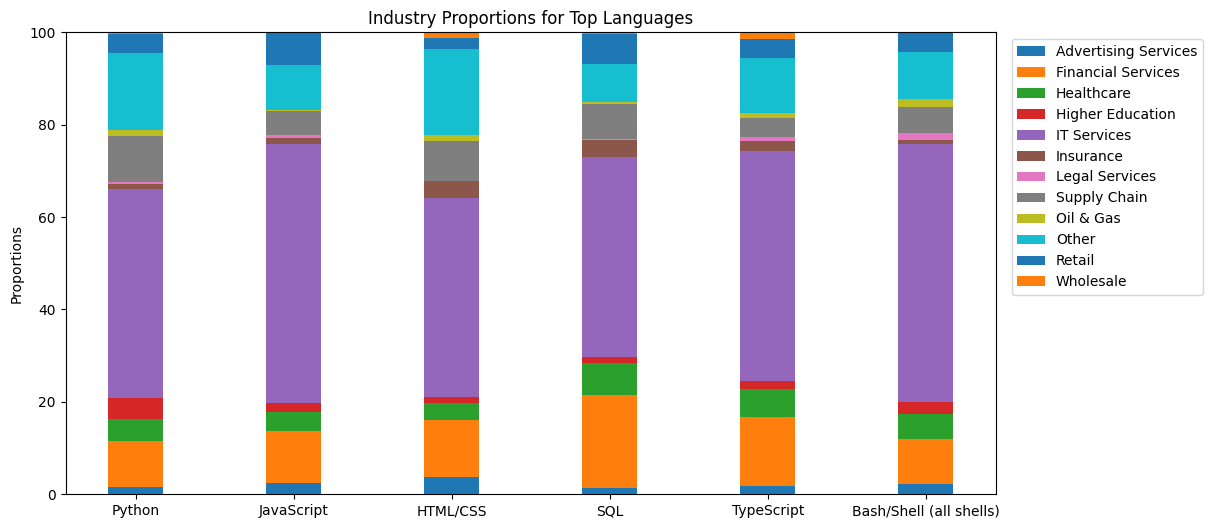

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 languages
top_10_languages = target_languages

# Convert industry data to this dictionary format
industry_means = {}

for industry in all_industries:
    industry_means[industry] = [language_industries_proportions[language][industry] for language in top_10_languages]

x = np.arange(len(top_10_languages))  # the label locations
width = 0.35  # the width of the bars
bottom = np.zeros(len(top_10_languages))  # Initialize the bottom values for stacking

fig, ax = plt.subplots(figsize=(12, 6))

for index, (attribute, measurement) in enumerate(industry_means.items()):
    if attribute == 'Information Services, IT, Software Development, or other Technology':
        attribute = 'IT Services'
    if 'Manufacturing' in attribute:
        attribute = 'Supply Chain' 
    if 'Retail' in attribute:
        attribute = 'Retail'
    rects = ax.bar(x, measurement, width, label=attribute, bottom=bottom)
    bottom += measurement

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Proportions')
ax.set_title('Industry Proportions for Top Languages')
ax.set_xticks(x, top_10_languages)
ax.legend(loc='upper center', bbox_to_anchor=(1.12, 1), ncol=1)

plt.show()


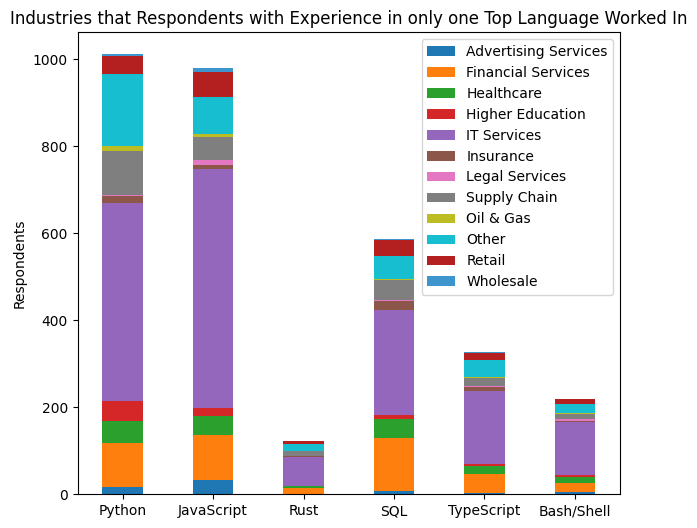

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 languages
top_10_languages = target_languages

# Convert industry data to this dictionary format
industry_means = {}

for industry in all_industries:
    industry_means[industry] = [language_industries[language][industry] for language in top_10_languages]

x = np.arange(len(top_10_languages))  # the label locations
width = 0.45  # the width of the bars
bottom = np.zeros(len(top_10_languages))  # Initialize the bottom values for stacking

fig, ax = plt.subplots(figsize=(7, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          '#b41f1f', '#3e95cd', '#75a31a', '#ff701a', '#f10a6f', '#5967d6', '#7167b8', '#f8dc39', '#a6b3a6', '#b17b50']

for index, (attribute, measurement) in enumerate(industry_means.items()):
    if attribute == 'Information Services, IT, Software Development, or other Technology':
        attribute = 'IT Services'
    if 'Manufacturing' in attribute:
        attribute = 'Supply Chain' 
    if 'Retail' in attribute:
        attribute = 'Retail'
    rects = ax.bar(x, measurement, width, label=attribute, bottom=bottom, color=colors[index])
    bottom += measurement

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Respondents')
ax.set_title('Industries that Respondents with Experience in only one Top Language Worked In')
# replace Bash/Shell with Bash/Shell (all shells)
top_10_languages = [language if language != 'Bash/Shell (all shells)' else 'Bash/Shell' for language in top_10_languages]
ax.set_xticks(x, top_10_languages)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.show()


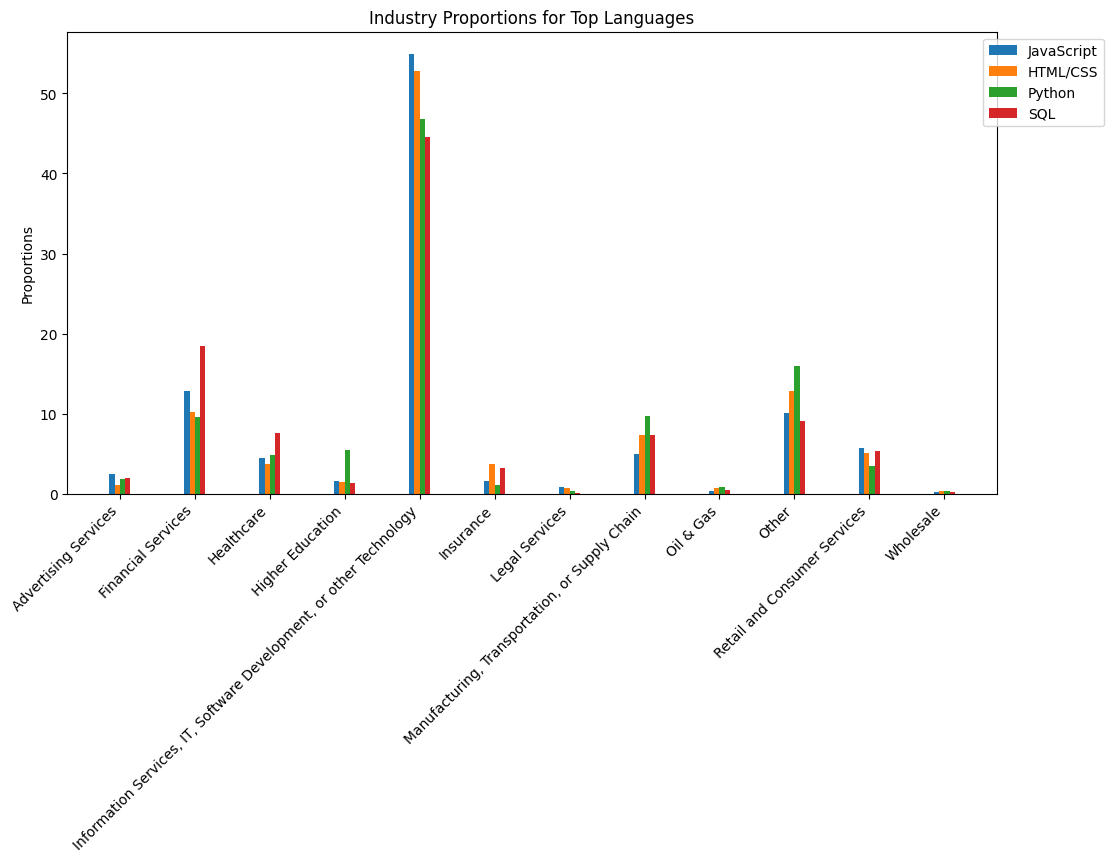

In [26]:
# Get top 10 languages
top_10_languages = list(counts.keys())[:5]

# Create Bar Plot for Top 10 Languages and their industries Proportions
import matplotlib.pyplot as plt
import numpy as np

# Convert industry data to this dictionary format
industry_means = {}

for language in top_10_languages:
    industry_means[language] = [language_industries_proportions[language][industry] for industry in all_industries]

x = np.arange(len(all_industries))  # the label locations
width = 0.07  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for index, (language, measurement) in enumerate(industry_means.items()):
    rects = ax.bar(x + index * width, measurement, width, label=language)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportions')
ax.set_title('Industry Proportions for Top Languages')
ax.set_xticks(x + width * (len(top_10_languages) - 1) / 2, all_industries)
ax.set_xticklabels(all_industries, rotation=45, ha='right')

# Move the legend to the side with text wrapping
legend = ax.legend(loc='upper center', bbox_to_anchor=(1.05, 1), ncol=1)
for text in legend.get_texts():
    text.set_wrap(True)

plt.show()


In [16]:
separate_into_boolean_columns('CodingActivities')

,ResponseId
count,89184.000000
mean,44592.500000
std,25745.347541
min,1.000000
25%,22296.750000
50%,44592.500000
75%,66888.250000
max,89184.000000


In [8]:
getUnique('CodingActivities')

['Bootstrapping a business',
 'Contribute to open-source projects',
 'Freelance/contract work',
 'Hobby',
 'I don’t code outside of work',
 'Other (please specify):',
 'Professional development or self-paced learning from online courses',
 'School or academic work']

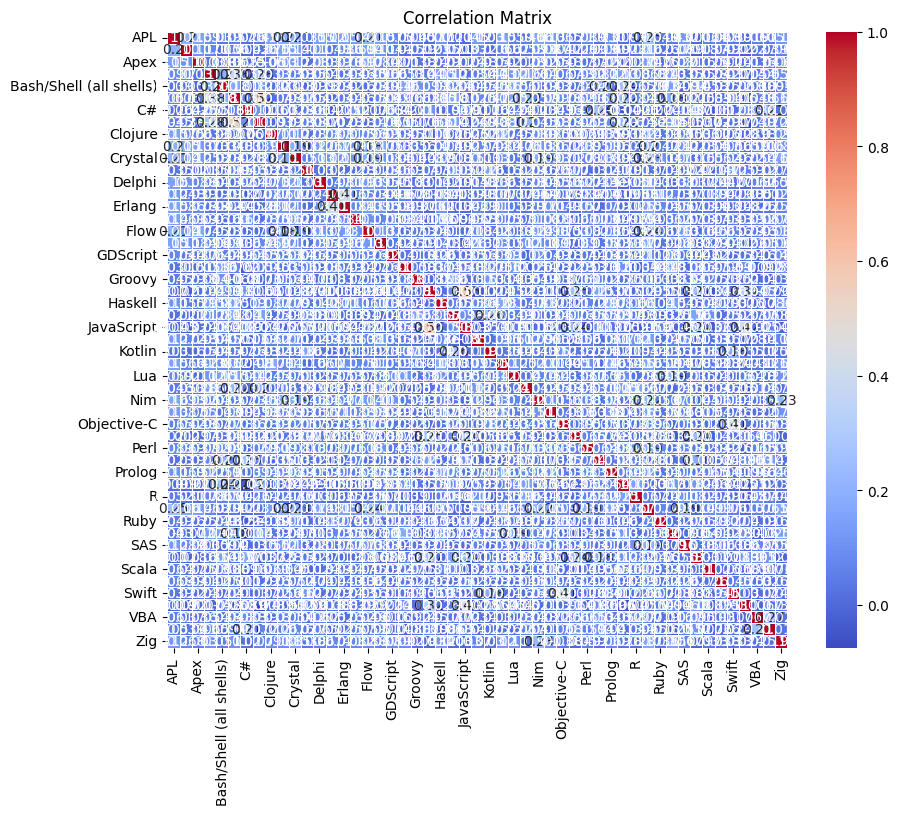

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame
languages = 'LanguageHaveWorkedWith'

# Create a subset of the DataFrame with the relevant columns
columns_of_interest = getUnique('LanguageHaveWorkedWith')  # Replace with your desired programming languages
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_17860\4042515649.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['LanguageHaveWorkedWith'] = subset_df['LanguageHaveWorkedWith'].str.split(';')


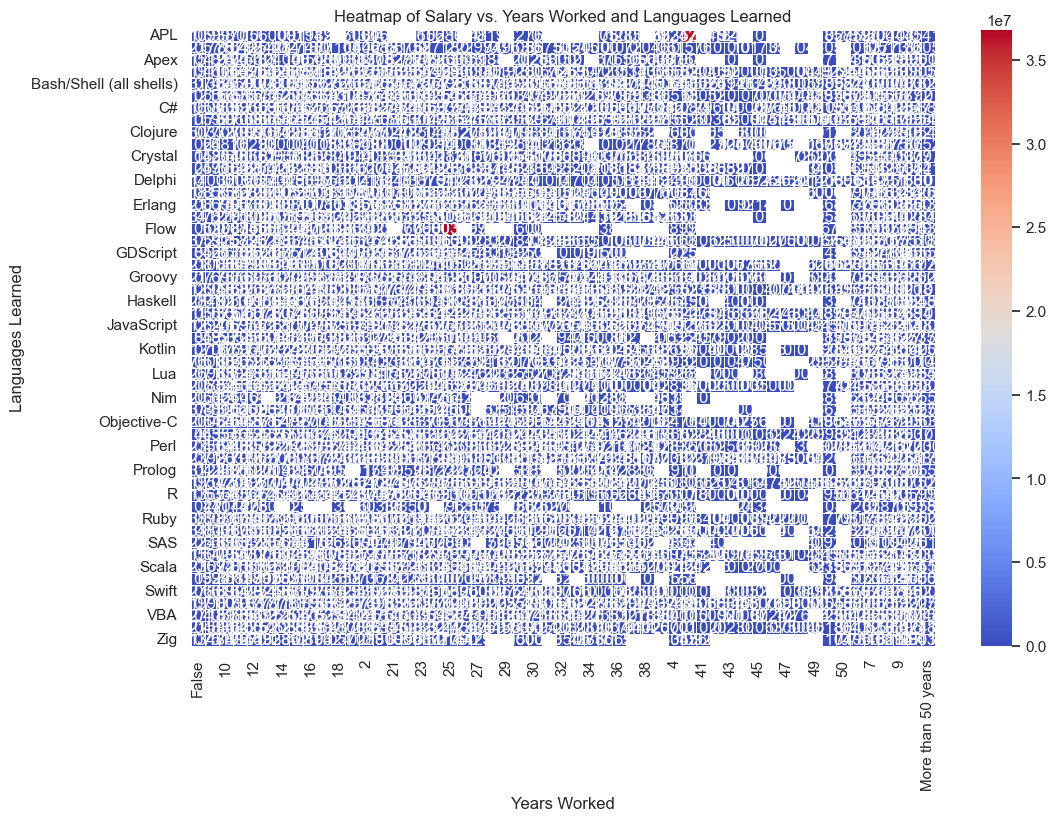

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the columns of interest
columns_of_interest = ['LanguageHaveWorkedWith', 'ConvertedCompYearly', 'YearsCodePro']

# Create a subset of the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Split the values in the 'LanguageHaveWorkedWith' column into a list of languages
subset_df['LanguageHaveWorkedWith'] = subset_df['LanguageHaveWorkedWith'].str.split(';')

# Explode the lists to create separate rows for each language
subset_df = subset_df.explode('LanguageHaveWorkedWith')

# Create a pivot table to aggregate the data
pivot_table = subset_df.pivot_table(index='LanguageHaveWorkedWith', columns='YearsCodePro', values='ConvertedCompYearly', aggfunc='median')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Salary vs. Years Worked and Languages Learned')
plt.xlabel('Years Worked')
plt.ylabel('Languages Learned')
plt.show()


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the columns for languages you are interested in
languages = ['Python', 'JavaScript', 'Java', 'C++']  # Add more languages as needed

# Extract the relevant columns
subset_df = df[['ConvertedCompYearly'] + languages]

# Melt the DataFrame to create separate rows for each language
subset_df = subset_df.melt(id_vars='ConvertedCompYearly', var_name='Language', value_name='Used')

# Filter the DataFrame to include only rows where the language was used
subset_df = subset_df[subset_df['Used']]

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from the 'ConvertedCompYearly' column
subset_df['ConvertedCompYearly'] = remove_outliers_iqr(subset_df['ConvertedCompYearly'])

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Language', y='ConvertedCompYearly', data=subset_df, cut=0, scale='count')
plt.title('Violin Plot of Compensation by Languages Worked With (Outliers Removed)')
plt.xlabel('Languages Worked With')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.show()


KeyError: "['Python', 'JavaScript', 'Java', 'C++'] not in index"

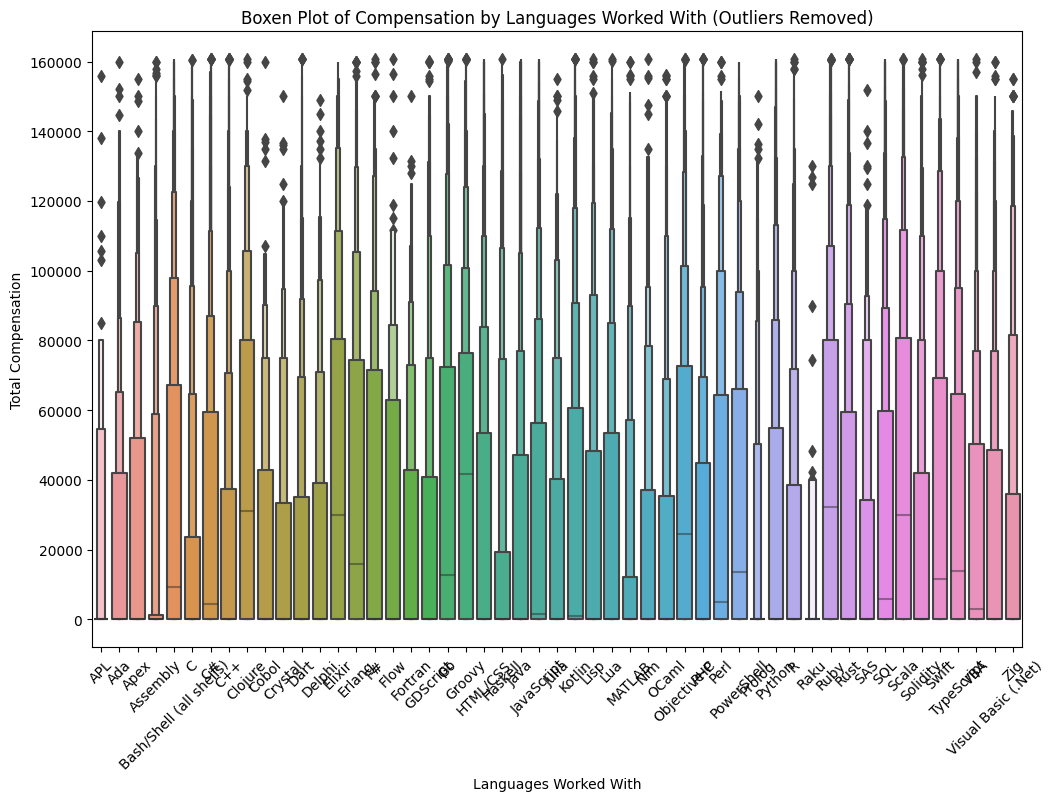

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the columns for languages you are interested in
languages = getUnique('LanguageHaveWorkedWith')  # Add more languages as needed

# Extract the relevant columns
subset_df = df[['ConvertedCompYearly'] + languages]

# Melt the DataFrame to create separate rows for each language
subset_df = subset_df.melt(id_vars='ConvertedCompYearly', var_name='Language', value_name='Used')

# Filter the DataFrame to include only rows where the language was used
subset_df = subset_df[subset_df['Used']]

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from the 'ConvertedCompYearly' column
subset_df['ConvertedCompYearly'] = remove_outliers_iqr(subset_df['ConvertedCompYearly'])

# Create a boxenplot
plt.figure(figsize=(12, 8))
sns.boxenplot(x='Language', y='ConvertedCompYearly', data=subset_df)
plt.title('Boxen Plot of Compensation by Languages Worked With (Outliers Removed)')
plt.xlabel('Languages Worked With')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.show()


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Age', y='ConvertedCompYearly', data=df)
plt.title('Total Compensation Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Compensation')
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()


ValueError: object arrays are not supported

In [69]:
def graph_pie(thing):
    # Calculate the proportions of True and False for each activity
    activity_counts = df[thing].value_counts()
    activity_labels = activity_counts.index
    activity_sizes = activity_counts.values

    # Create a pie chart using Matplotlib
    plt.pie(activity_sizes, labels=activity_labels, autopct='%1.1f%%')
    plt.title(thing)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

    plt.show()
graph_pie('CodingActivities_Bootstrapping a business')

KeyError: 'CodingActivities_Bootstrapping a business'

ValueError: could not convert string to float: 'Less than 1 year'

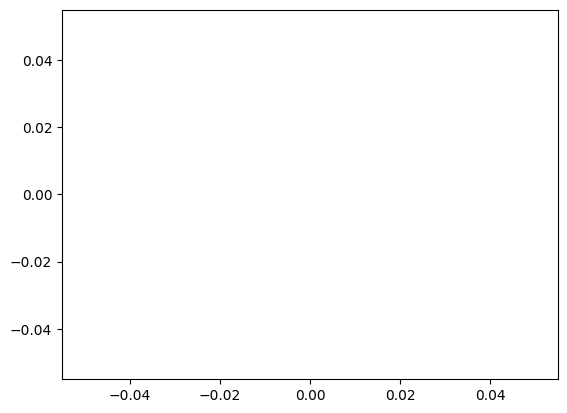

In [23]:
sns.scatterplot(x='YearsCode', y='ConvertedCompYearly', data=df)
plt.title('Total Compensation vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Total Compensation')
plt.show()

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Scatterplot with varying point sizes and hues for language type
plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

df['YearsCodeNumeric'] = df['YearsCode'].map({ 'Less than 1 year': 0, 'More than 50 years': 51 }).astype(float)

# Select the columns for the scatterplot
x_column = "YearsCodeNumeric"  # X-axis: Years Coded
y_column = "ConvertedCompYearly"  # Y-axis: Compensation
hue_column = "LanguageHaveWorkedWith"  # Hue: Language type
size_column = "LanguageHaveWorkedWith"  # Size: Language type

# Create the scatterplot
sns.scatterplot(x=x_column, y=y_column, hue=hue_column, size=size_column, sizes=(20, 200), palette="muted", alpha=0.7, data=df)

# Set labels and title
plt.title('Scatterplot with Varying Point Sizes and Hues for Language Type')
plt.xlabel('Years Coded')
plt.ylabel('Total Compensation')

# Scatter plot with years coded on the x-axis and compensation on the y-axis
plt.figure(figsize=(12, 6))
plt.title('Scatter Plot of Years Coded vs. Compensation')
sns.scatterplot(x="YearsCode", y="ConvertedCompYearly", data=df, alpha=0.5)

plt.xlabel('Years Coded')
plt.ylabel('Total Compensation')

plt.show()


KeyboardInterrupt: 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

languages = getUnique('LanguageWantToWorkWith')
separate_into_boolean_columns('LanguageWantToWorkWith')

,ResponseId
count,51178.000000
mean,45029.936144
std,26340.825288
min,1.000000
25%,21550.750000
50%,45721.000000
75%,68054.500000
max,89181.000000


In [21]:
counts = {}

for language in languages:
    counts[language] = df[language].sum()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
counts

{'JavaScript': 33271,
 'HTML/CSS': 28032,
 'Python': 26826,
 'SQL': 24108,
 'TypeScript': 21978,
 'Java': 16566,
 'Bash/Shell (all shells)': 16072,
 'C#': 13226,
 'C++': 12116,
 'C': 10652,
 'PHP': 9282,
 'Rust': 7647,
 'Go': 7085,
 'PowerShell': 6557,
 'Kotlin': 5070,
 'Dart': 3738,
 'Lua': 3303,
 'Assembly': 2941,
 'MATLAB': 2483,
 'R': 2345}

In [22]:
# get the proportion of each language in the dataset
for key, value in enumerate(counts):
    counts[value] = round(counts[value] * 100 / len(df), 2)
counts
top10 = dict(list(counts.items())[0:10])

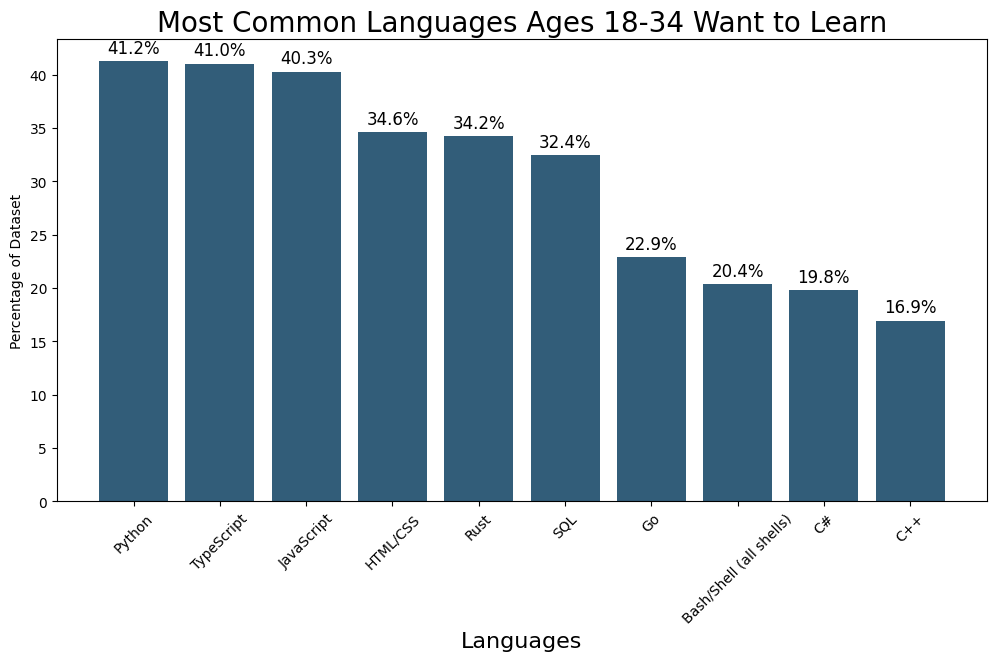

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined 'top10' and 'counts' as per your code

# Define a single blue color
blue_color = '#325d79'  # You can use any valid color name or hex code

plt.figure(figsize=(12, 6))

# Use the 'color' parameter to specify the bar color (single blue color)
bars = plt.bar(top10.keys(), top10.values(), color=blue_color)

# Add data labels (percent values) to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

plt.title('Most Common Languages Ages 18-34 Want to Learn', fontsize=20)
plt.xlabel('Languages', fontsize=16)
plt.ylabel('Percentage of Dataset')
plt.xticks(rotation=45)

plt.show()


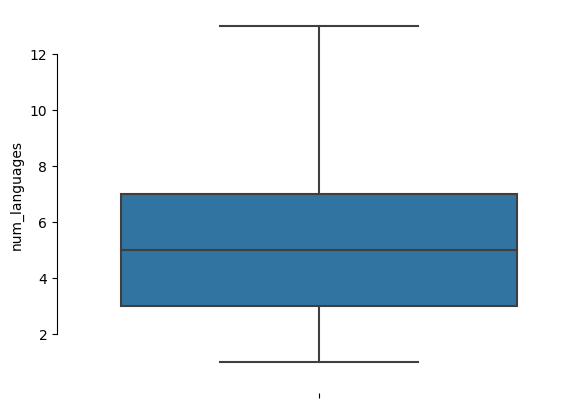

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the IQR for the 'num_languages' column
Q1 = df['num_languages'].quantile(0.25)
Q3 = df['num_languages'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['num_languages'] >= lower_bound) & (df['num_languages'] <= upper_bound)]

# Create a box and whisker plot without outliers
sns.boxplot(y='num_languages', data=df_no_outliers)
sns.despine(offset=10, trim=True)

plt.show()


In [23]:
df = df[df['Python'] == True][df['JavaScript'] == True][df['Bash/Shell (all shells)'] == True]
df.describe()

C:\Users\akash\AppData\Local\Temp\ipykernel_21116\1566581347.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Python'] == True][df['JavaScript'] == True][df['Bash/Shell (all shells)'] == True]


,ResponseId
count,7653.000000
mean,46081.829740
std,26543.816665
min,32.000000
25%,23291.000000
50%,47118.000000
75%,69960.000000
max,89169.000000


In [5]:
languages = {}

# Convert numbers to floats and less than 1 year text to 0\
map_dict = { 'Less than 1 year': 0.5, 'More than 50 years': 51, False: 0.5 }
for num in range(1, 51):
    map_dict[str(num)] = num

df['YearsCodeProNum'] = df['YearsCodePro'].map(map_dict).astype(float)

for language in getUnique('LanguageWantToWorkWith'):
    # find the salary
    average_salary = df[df[language] == True]['ConvertedCompYearly'].mean()
    
    average_years_worked = df[df[language] == True]['YearsCodeProNum'].mean()
    languages[language] = [df[language].sum(), average_salary, average_years_worked]

# language, count, average salary, average years worked
languages

{'APL': [118, 28832.118644067796, 3.694915254237288],
 'Ada': [301, 339081.0299003322, 3.8588039867109636],
 'Apex': [279, 61697.3476702509, 4.756272401433692],
 'Assembly': [2941, 28369.81332879973, 2.4437266235974158],
 'Bash/Shell (all shells)': [16072, 58716.4587481334, 4.2395781483325035],
 'C': [10652, 27846.81778069846, 2.75661847540368],
 'C#': [13226, 39665.152200211705, 4.231211250567065],
 'C++': [12116, 34364.15112248267, 3.0422581710135357],
 'Clojure': [538, 65513.1375464684, 5.245353159851301],
 'Cobol': [182, 116910.58241758242, 4.164835164835165],
 'Crystal': [184, 74838.09782608696, 4.644021739130435],
 'Dart': [3738, 27441.83975387908, 3.432450508293205],
 'Delphi': [389, 62037.6529562982, 5.688946015424165],
 'Elixir': [1068, 64990.46161048689, 5.502808988764045],
 'Erlang': [424, 76460.6320754717, 5.265330188679245],
 'F#': [425, 68313.09176470588, 4.610588235294117],
 'Flow': [133, 63646.97744360902, 5.2443609022556394],
 'Fortran': [306, 56311.36274509804, 3.3660

In [41]:
df['Python'].sum()
# Count the number of people who know Python


26826

In [6]:
# sort the language dictionairy based on number or respondents
languages = {k: v for k, v in sorted(languages.items(), key=lambda item: item[1][0], reverse=True)[:20]}

languages

{'JavaScript': [33271, 43498.19094707102, 4.10143969222446],
 'HTML/CSS': [28032, 40846.7640553653, 3.899650399543379],
 'Python': [26826, 45435.38089912771, 3.5371281592484904],
 'SQL': [24108, 43269.92380122781, 4.294300647088104],
 'TypeScript': [21978, 48643.89057239057, 4.429065429065429],
 'Java': [16566, 36574.22775564409, 3.653869371000845],
 'Bash/Shell (all shells)': [16072, 58716.4587481334, 4.2395781483325035],
 'C#': [13226, 39665.152200211705, 4.231211250567065],
 'C++': [12116, 34364.15112248267, 3.0422581710135357],
 'C': [10652, 27846.81778069846, 2.75661847540368],
 'PHP': [9282, 30363.49202758026, 4.324714501185089],
 'Rust': [7647, 49032.34013338564, 3.5612658558911994],
 'Go': [7085, 60159.47127734651, 4.722230063514467],
 'PowerShell': [6557, 47496.78755528443, 4.33422296782065],
 'Kotlin': [5070, 48230.74674556213, 4.415581854043393],
 'Dart': [3738, 27441.83975387908, 3.432450508293205],
 'Lua': [3303, 41092.336663639115, 3.4215864365728126],
 'Assembly': [2941,

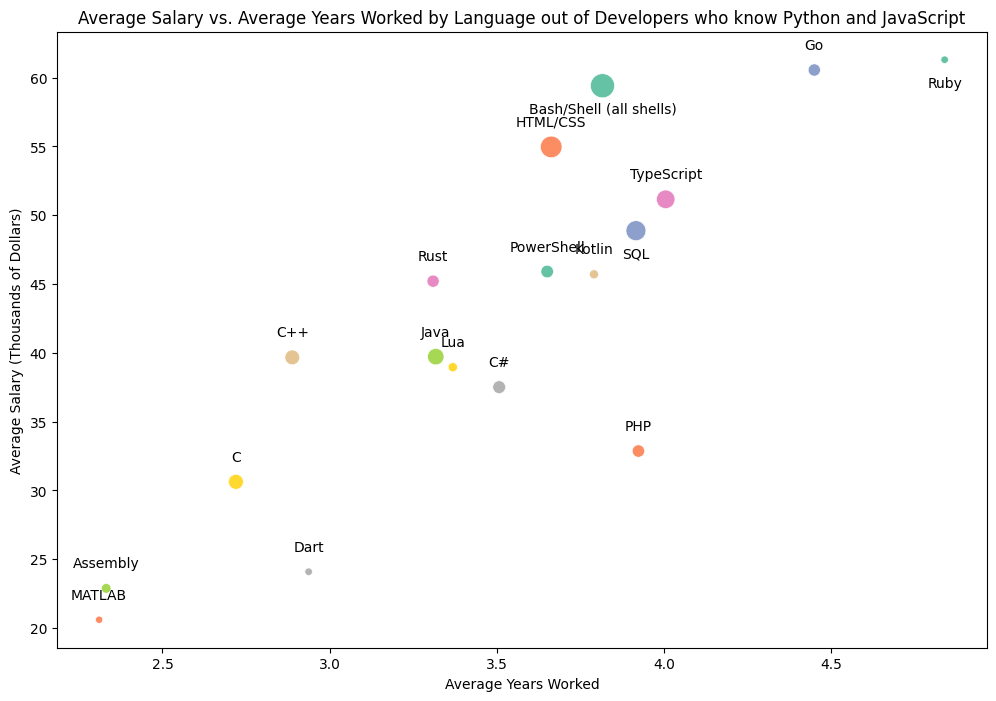

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the dictionary
data = {
    'Language': [],
    'Years Worked': [],
    'Salary': [],
    'Respondents': []
}

for language, values in languages.items():
    if language in ('Python', 'JavaScript'):
        continue
    data['Language'].append(language)
    data['Years Worked'].append(values[-1])
    data['Salary'].append(values[-2] / 1000)
    data["Respondents"].append(values[-3])

df = pd.DataFrame(data)

# Scale the dot size based on the number of respondents
dot_size = df['Respondents'] / df['Respondents'].max() * 300

# Create a scatter plot using seaborn with scaled dot size
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Years Worked', y='Salary', hue='Language', palette='Set2', s=dot_size, legend=False)

# Add labels for each point
for i in range(len(df)):
    if data['Language'][i] in ['Ruby', 'Bash/Shell (all shells)', 'SQL']:
        plt.text(df['Years Worked'][i], df['Salary'][i] - 2, df['Language'][i], fontsize=10, ha='center')
        continue
    plt.text(df['Years Worked'][i], df['Salary'][i] + 1.5, df['Language'][i], fontsize=10, ha='center')

# Set labels and title
plt.xlabel('Average Years Worked')
plt.ylabel('Average Salary (Thousands of Dollars)')
plt.title('Average Salary vs. Average Years Worked by Language out of Developers who know Python and JavaScript')

# Show the plot
plt.show()

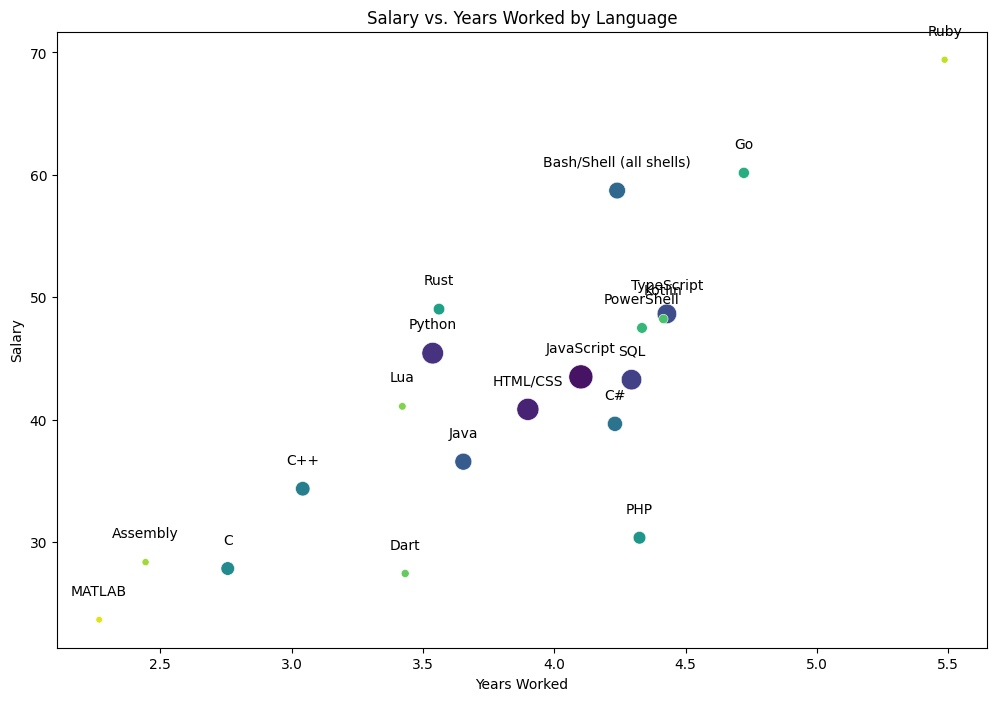

In [91]:
# Scale the dot size based on the number of respondents
dot_size = df['Respondents'] / df['Respondents'].max() * 300

# Create a scatter plot using seaborn with scaled dot size and disable the legend
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Years Worked', y='Salary', hue='Language', palette='viridis', s=dot_size, legend=False)

# Add labels for each point above the dots
for i in range(len(df)):
    plt.text(df['Years Worked'][i], df['Salary'][i] + 2, df['Language'][i], fontsize=10, ha='center')

# Set labels and title
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('Salary vs. Years Worked by Language')

# Show the plot
plt.show()

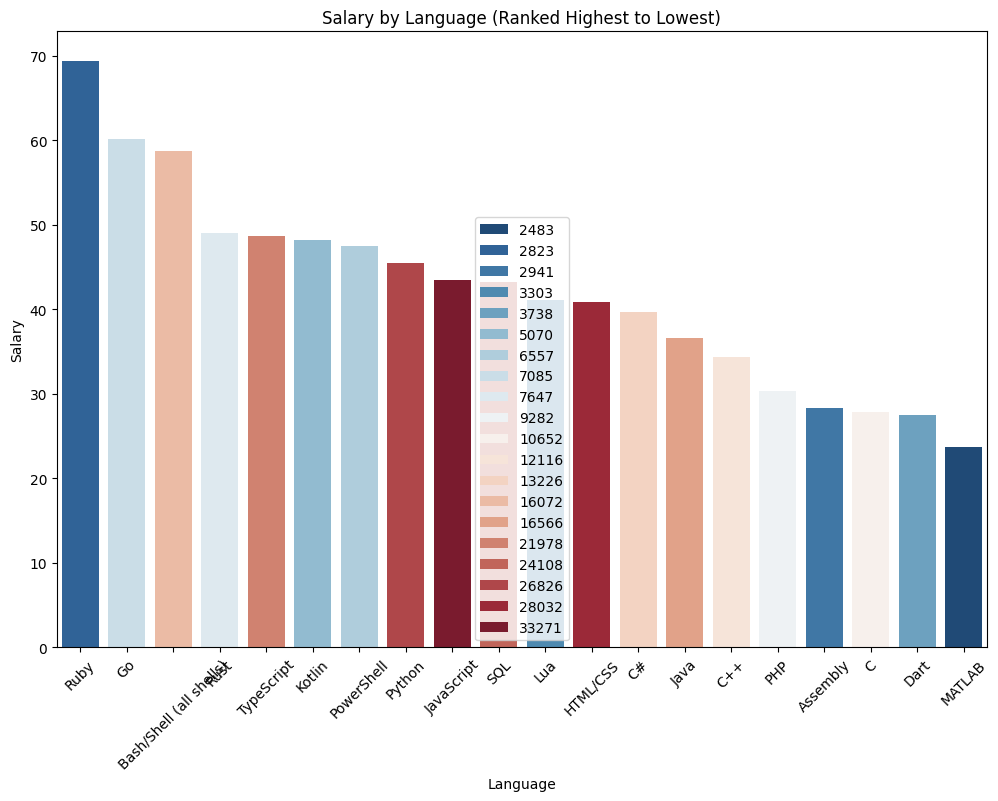

In [112]:
custom_palette = sns.color_palette("RdBu_r", n_colors=len(df))

# Sort the DataFrame by Salary in descending order
df = df.sort_values(by='Salary', ascending=False)

# Create a bar graph with larger bars and custom hue
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Language', y='Salary', palette=custom_palette, hue='Respondents', dodge=False)

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Salary')
plt.title('Salary by Language (Ranked Highest to Lowest)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the legend title
plt.legend(title='')

# Show the plot
plt.show()

ValueError: [(0.071280276816609, 0.2878892733564014, 0.5188004613610151), (0.12295271049596312, 0.38754325259515576, 0.657208765859285), (0.18431372549019615, 0.4726643598615917, 0.7116493656286045), (0.24705882352941183, 0.5557093425605537, 0.7540945790080739), (0.3720876585928491, 0.6456747404844292, 0.8020761245674741), (0.5300269127258748, 0.7456362937331797, 0.8560553633217993), (0.6549019607843138, 0.8143790849673204, 0.8941176470588236), (0.7711649365628607, 0.8734332948865823, 0.9273356401384084), (0.8605151864667436, 0.9174163783160324, 0.9487120338331411), (0.930642060745867, 0.9506343713956171, 0.9616301422529796), (0.9746251441753172, 0.940638216070742, 0.9206459054209919), (0.9856978085351789, 0.8889657823913879, 0.8320645905420991), (0.9852364475201846, 0.8173010380622837, 0.7273356401384083), (0.9686274509803922, 0.7176470588235294, 0.6), (0.9407151095732411, 0.609919261822376, 0.481276432141484), (0.8807381776239908, 0.47197231833910036, 0.3753171856978085), (0.8226066897347174, 0.34325259515570933, 0.28627450980392155), (0.7561707035755478, 0.21038062283737025, 0.22352941176470587), (0.6807381776239907, 0.08858131487889273, 0.16585928489042678), (0.5423298731257209, 0.044290657439446365, 0.1437139561707036)] is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

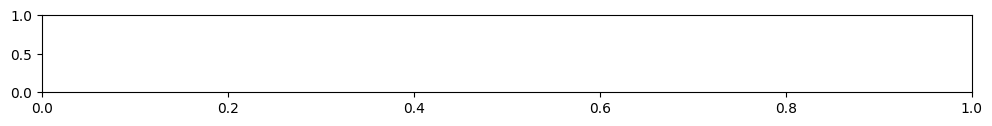

In [106]:
# Create a new figure for the color gradient
plt.figure(figsize=(12, 1))
ax = plt.gca()
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=custom_palette), cax=ax, orientation='horizontal')
cbar.set_label('Number of Respondents')

# Show the plot
plt.show()

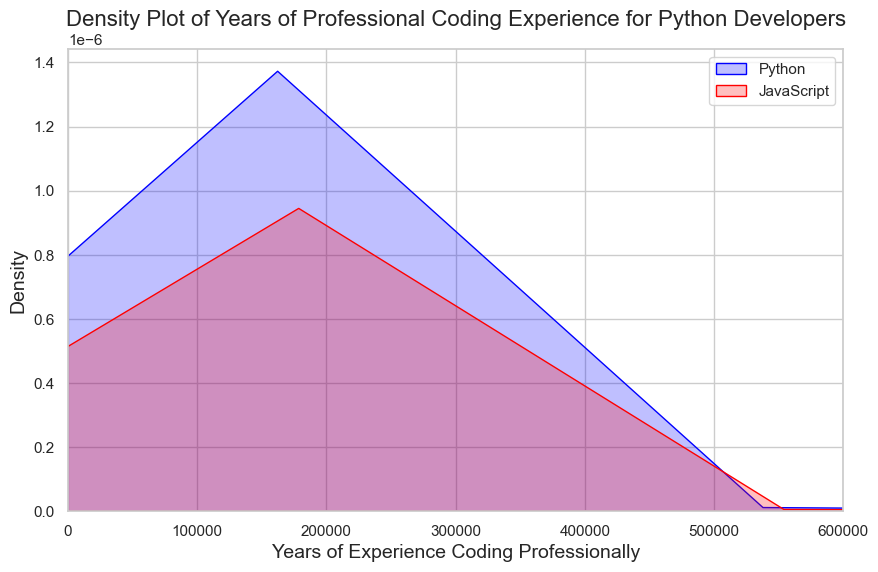

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for Python developers
python_data = df[df['LanguageWantToWorkWith'].str.contains('Python', na=False)]

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create a density plot for Python developers
sns.kdeplot(data=python_data, x='ConvertedCompYearly', fill=True, common_norm=False, color='blue', label='Python')

Javascript_data = df[df['LanguageWantToWorkWith'].str.contains('Java', na=False)]
sns.kdeplot(data=Javascript_data, x='ConvertedCompYearly', fill=True, common_norm=False, color='red', label='JavaScript')



# Customize the plot
plt.title('Density Plot of Years of Professional Coding Experience for Python Developers', fontsize=16)
plt.xlabel('Years of Experience Coding Professionally', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Set x-axis limits
plt.xlim(0, 600000)

plt.legend()
plt.show()


ValueError: Could not interpret value `Salary` for parameter `x`

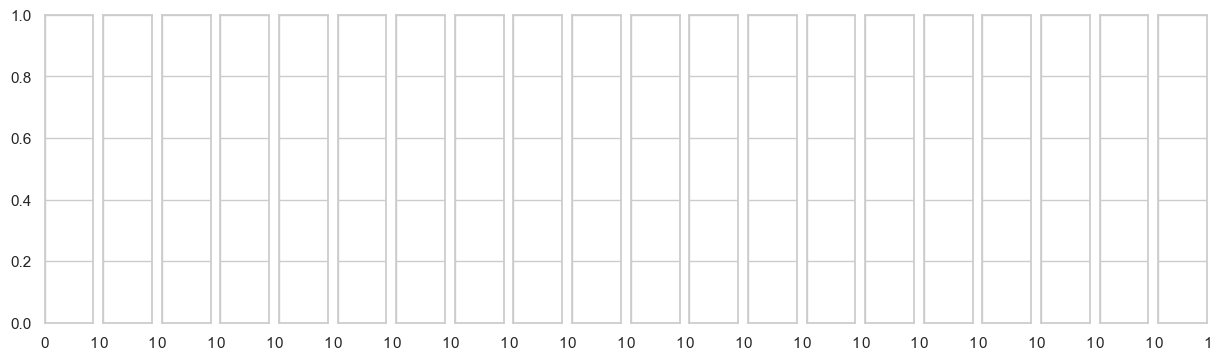

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df)

KeyboardInterrupt: 